# Data Preprocessing

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt


In [2]:
# Load data
# https://www.kaggle.com/prithwirajmitra/covid-face-mask-detection-dataset
data_path=r'C:\Users\PRANAV\Desktop\face_mask_detection\data'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

In [3]:
label_dict=dict(zip(categories,labels)) #empty dictionary

In [4]:
label_dict

{'WithMask': 0, 'WithoutMask': 1}

In [5]:
img_size=100
data=[]
target=[]
 
for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [6]:
# normalize data
data=np.array(data)/255.0

In [7]:
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

In [8]:
from keras.utils import np_utils

In [9]:
new_target=np_utils.to_categorical(target)

In [10]:
data=np.load('data_.npy')
target=np.load('target_.npy')

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [12]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.33)

In [14]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/5
168/168 [==============================] - ETA: 0s - loss: 0.3326 - accuracy: 0.8460WARNING:tensorflow:From C:\Users\PRANAV\Anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model\assets
168/168 [==============================] - 160s 953ms/step - loss: 0.3326 - accuracy: 0.8460 - val_loss: 0.1143 - val_accuracy: 0.9597
Epoch 2/5
168/168 [==============================] - 164s 976ms/step - loss: 0.1387 - accuracy: 0.9472 - val_loss: 0.0957 - val_accuracy: 0.9664
Epoch 3/5
168/168 [==============================] - 162s 964ms/step - loss: 0.0861 - accur

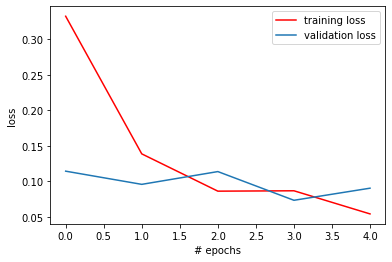

In [15]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

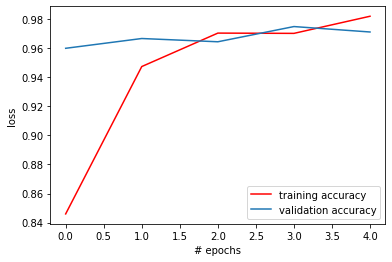

In [16]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
model.evaluate(test_data,test_target)

104/104 [==============================] - 27s 258ms/step - loss: 0.0767 - accuracy: 0.9730


[0.0766986832022667, 0.9730221033096313]